PREDICTING TELCO CUSTOMER CHURN

1. Defining the question

a) Specifying the Data Analytic Question

The solution will seek to establish customer churn for Telco. The predction will be based on Telco data and wil also give in depth insights into some of the key demographic factors that might drive individuals agreeing to churn.

b) The Metric for Success

We aim to establish the factors that detemine the factors that determine whether an individual will churn or not. We will also make reccomendations to Telsos on ways they can use to ensure that they reach more people and increase their chances of getting positive response in effort to turn customers.

c) The Experimental Design
 Below are the steps taken in this analysis
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Univariate analysis
 5. Bivariate analysis
 6. Multivariate analysis
 7. Implementing the solution by using the neccesary analysis(XGBoost)
 8. Challenging the solution and giving insights on how improvements can be made.

d) Data Relevance and Validation 

The data available is relevant for the intended analysis. It contains demographic information that is significant to determine customer churn for Telcos.
The data will help us in answering the data analytic question on the demographic factors that affect customer churn for Telcos. The data will also enable predicting the customer churn. 

e) Understanding the context 

The data set we are to work with contains the following columns:
i. Customer ID:Customer ID
ii. Gender: Whether the customer is a male or a female
iii. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
iv. Partner: Whether the customer has a partner or not (Yes, No)
v. Dependents: Whether the customer has dependents or not (Yes, No)
vi. Tenure: Number of months the customer has stayed with the company
vii. PhoneService: Whether the customer has a phone service or not (Yes, No)
viii. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
ix. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
x. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
xi. OnlineBackup : Whether the customer has online backup (Yes, No, No Internet service)
xii. DeviceProtection : Whether the customer has device protection (Yes, No, No Internet service)
xiii. TechSupport : Whether the customer receives technical support (Yes, No, No Internet service)
xiv. StreamingTV : Whether the customer has streaming TV (Yes, No, no Internet service) (The customer has a third-party indicates whether the provider uses the Internet service to broadcast television programs)
xv. StreamingMovies : Whether the customer has streaming movies (Yes, No, No Internet service) (Customer has a third-party Indicates whether the customer is using the Internet service to stream movies from the provider)
xvi. Contract : Duration of the customer's contract (Month to month, One year, Two years)
xvii. PaperlessBilling : Whether the customer has a paperless bill (Yes, No)
xix. PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic)
xx. MonthlyCharges : Amount charged to the customer monthly
xxi. TotalCharges : Total amount charged to the customer
xxii. Churn : Whether the customer is using or not (Yes or No) - Customers who left in the last month or quarter.

> Each row represents a unique customer. The variables contain differetn information about the customers' service, account and demographic data.

> Services that customers sign up for include phone, diffferent lines, internet, online security, online backup, device protection, technical support and movies streaming.
> Customer account information include duration they have been a customer, contract, payment method, paperless billing, monthly charges and and total charges.
> Demographic information about clients include the gender, age range, partners and dependents.

Telco customer churn contains information about a fictitious telecom company providing home phone and Internet services to 7043 customers in California in the third quarter. It includes which customers left, stayed or signed up for service.

The data set consists of 21 Variables and 7043 Observations.

2. Reading the Data

In [1]:
#Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the dataset

customer_churn=pd.read_csv("/home/sammy/Documents/Predicting Telco Customer Churn/Telco-Customer-Churn.csv")
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Checking the datatail
customer_churn.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [19]:
#Previewing the dataset

print(f"This dataset contains {customer_churn.shape[0]} rows and {customer_churn.shape[1]} columns")


This dataset contains 7043 rows and 21 columns


In [5]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Previewing the summary Statistics
customer_churn.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
#Checking the number of uniques values in each column

customer_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
#Getting the columns names for the dataset

col_names=customer_churn.columns
col_names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#Getting the unique values in each column

columns_to_check=['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

    
# # Iterate through the column names and print unique values
for column_name in columns_to_check:
     print(f"Unique values in {column_name} column: {customer_churn[column_name].unique()}")

Unique values in SeniorCitizen column: [0 1]
Unique values in Partner column: ['Yes' 'No']
Unique values in Dependents column: ['No' 'Yes']
Unique values in tenure column: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in PhoneService column: ['No' 'Yes']
Unique values in MultipleLines column: ['No phone service' 'No' 'Yes']
Unique values in InternetService column: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity column: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup column: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection column: ['No' 'Yes' 'No internet service']
Unique values in TechSupport column: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV column: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies column: ['No

3. Data Cleaning

In [17]:
#Checking for Null Values
print(f"There are {customer_churn.isnull().sum().sum()} null values in the dataset")

There are 0 null values in the dataset


In [11]:
#Checking the columns to ascertain they are well written
col_name=customer_churn.columns
col_name

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We see that some column names are not put in the right format, there are errors and inconsinstency

In [12]:
# Rectifying the errors and inconsistencies in the column names

def correct_column_name(col_name):
    # Replace spaces with underscores
    col_name = col_name.replace(' ', '_')
    # Convert to lowercase
    col_name = col_name.lower()
    
    
    return col_name

# Apply the mapping function to correct the column names
customer_churn.columns = customer_churn.columns.map(correct_column_name)

# Display the column names to check the corrected column names
Cols=customer_churn.columns
print(Cols)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [15]:
# Previewing the total charges column values
totalcharges = customer_churn['totalcharges']

totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [14]:
# Changing the data type of total charges column 

# Replace non-numeric values with 0
customer_churn["totalcharges"] = pd.to_numeric(customer_churn["totalcharges"], errors="coerce").fillna(0)

customer_churn["totalcharges"].astype("float64")

customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [24]:
#Checking for duplicates in the data

duplicates=customer_churn.duplicated().sum()
print(f"The data contains {duplicates} duplicate values")

The data contains 0 duplicate values


/tmp/ipykernel_3987/56111624.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customer_churn.corr(), annot=True, cmap='RdYlBu', fmt='.2f',


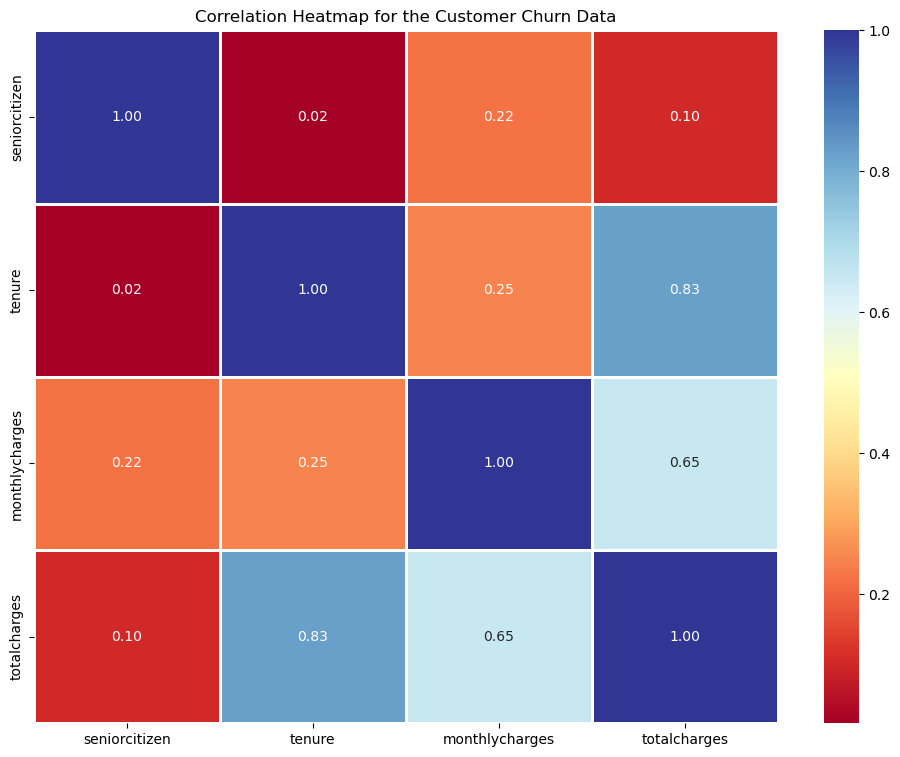

In [25]:
#Visualizing the correlation heatmap

plt.figure(figsize=(12, 9))
sns.heatmap(customer_churn.corr(), annot=True, cmap='RdYlBu', fmt='.2f',
            annot_kws=None,
            linewidths=1)
plt.title("Correlation Heatmap for the Customer Churn Data")
plt.show()
            

4. Exploratory Data Analysis

In [26]:
customer_churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

<Axes: >

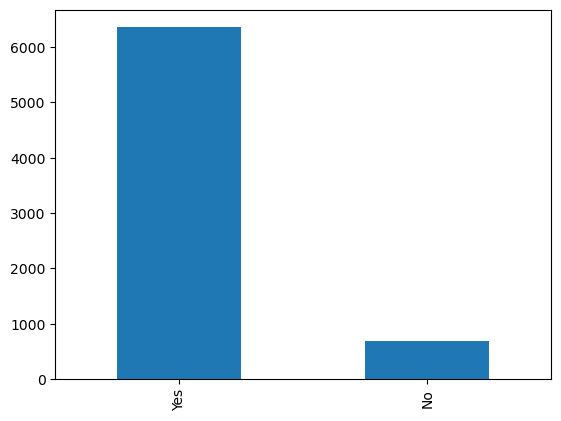

In [31]:
customer_churn['phoneservice'].value_counts().sort_values(ascending=False).plot(kind='bar')